In [169]:
import numpy as np

"""
Reading the corresponding file generated by the Line Segment Detector
"""

file = open('fig1.png.txt','r')
lines_list = []
for i in file:
    arr = i.split()
    for elem in range(len(arr)):
        arr[elem] = float(arr[elem])
    lines_list.append(arr)
file.close()




In [170]:
lines_list[0]

[553.183267, 488.74241, 533.009046, 490.646329, 3.381075, 0.125, 17.063908]

In [171]:
690/2

345.0

In [172]:
345/5

69.0

In [173]:
69/3

23.0

In [174]:
23*30

690

In [210]:

"""
   Mesh Grid Settings are being set here.
   The Size per grid has also been set here.
"""
import cv2 as cv
img = cv.imread('fig1.png')
Y,X = img.shape[:2]
cx= int(X/30)
cy = int(Y/30)
n_quads= n_cols*n_rows
number_of_vertices = (n_cols+1)*(n_rows+1)

x_len = (X-1)/n_rows
y_len = (Y-1)/n_cols
linethreshold = 16
linesegthreshold = (x_len**2+y_len**2)/64


In [211]:
linesegthreshold

29.60417151616287

In [208]:
x_len,y_len


(30.96551724137931, 30.59090909090909)

In [205]:
linesegthreshold

20.703125

In [207]:
(x_len**2+y_len**2)/64

29.60417151616287

In [212]:
temp = 0
vertexX = np.zeros(1)
while(1):
    temp+=x_len
    temp = (round(temp,10))
    vertexX = np.append(vertexX,temp)
    print(temp)
    if temp>X-2:
        break

30.9655172414
61.9310344828
92.8965517242
123.8620689656
154.827586207
185.7931034484
216.7586206898
247.7241379312
278.6896551726
309.655172414
340.6206896554
371.5862068968
402.5517241382
433.5172413796
464.482758621
495.4482758624
526.4137931038
557.3793103452
588.3448275866
619.310344828
650.2758620694
681.2413793108
712.2068965522
743.1724137936
774.137931035
805.1034482764
836.0689655178
867.0344827592
898.0000000006


In [213]:
vertexX

array([  0.        ,  30.96551724,  61.93103448,  92.89655172,
       123.86206897, 154.82758621, 185.79310345, 216.75862069,
       247.72413793, 278.68965517, 309.65517241, 340.62068966,
       371.5862069 , 402.55172414, 433.51724138, 464.48275862,
       495.44827586, 526.4137931 , 557.37931035, 588.34482759,
       619.31034483, 650.27586207, 681.24137931, 712.20689655,
       743.17241379, 774.13793103, 805.10344828, 836.06896552,
       867.03448276, 898.        ])

In [216]:
temp = 0
vertexY = np.zeros(1)
while(1):
    temp+=y_len
    temp = (round(temp,10))
    vertexY = np.append(vertexY,temp)
    print(temp)
    if temp>Y-2:
        break

30.5909090909
61.1818181818
91.7727272727
122.3636363636
152.9545454545
183.5454545454
214.1363636363
244.7272727272
275.3181818181
305.909090909
336.4999999999
367.0909090908
397.6818181817
428.2727272726
458.8636363635
489.4545454544
520.0454545453
550.6363636362
581.2272727271
611.818181818
642.4090909089
672.9999999998


In [217]:
vertexY

array([  0.        ,  30.59090909,  61.18181818,  91.77272727,
       122.36363636, 152.95454545, 183.54545455, 214.13636364,
       244.72727273, 275.31818182, 305.90909091, 336.5       ,
       367.09090909, 397.68181818, 428.27272727, 458.86363636,
       489.45454545, 520.04545455, 550.63636364, 581.22727273,
       611.81818182, 642.40909091, 673.        ])

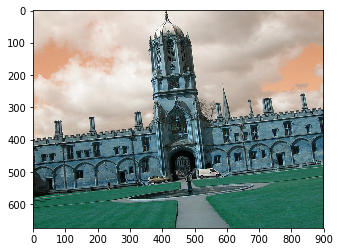

In [218]:
plt.imshow(img)

In [224]:
gridX, gridY = np.meshgrid(vertexX,vertexY)

In [225]:
Vx = np.reshape(gridX,number_of_vertices,1)
Vy = np.reshape(gridY,number_of_vertices,1)

In [226]:
V = np.zeros((number_of_vertices*2))
for i in range(690):
    V[2*i] = Vx[i]
    V[2*i+1] = Vy[i]

In [227]:
dx = x_len
dy = y_len

In [228]:
y_len

30.59090909090909

In [304]:
#
# line segment intersection using vectors
# see Computer Graphics by F.S. Hill
#

def perp( a ) :
    b = empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = dot( dap, db)
    num = dot( dap, dp )
    return (num / denom.astype(float))*db + b1

p1 = np.array( [0.0, 0.0] )
p2 = np.array( [1.0, 0.0] )

p3 = np.array( [4.0, -5.0] )
p4 = np.array( [4.0, 2.0] )

print (seg_intersect( p1,p2, p3,p4))

p1 = np.array( [2.0, 2.0] )
p2 = np.array( [4.0, 3.0] )

p3 = np.array( [6.0, 0.0] )
p4 = np.array( [6.0, 3.0] )

print (seg_intersect(p1,p2, p3,p4))

[4. 0.]
[6. 4.]


In [505]:
lines = np.zeros((1,6))
lines_count = 0
from math import floor
from math import ceil
from math import atan
from math import pi

delta = 6.1
for i in range(len(lines_list)):
    
    x1 = lines_list[i][0]; y1 = lines_list[i][1]; x2 = lines_list[i][2]; y2 = lines_list[i][3]
    if(max(x1,x2)>X or max(y1,y2)>Y or min(x1,x2,y1,y2)<1):
        continue
    if((x1-x2)**2 + (y1-y2)**2)<linesegthreshold:
        continue
    if x1>x2:
        right_x = x1
        left_x = x2
    else:
        left_x = x1
        right_x = x2
    if y1>y2:
        y_top = y2
        y_bottom = y1
    else:
        y_top = y1
        y_bottom = y2

    xi= np.array([x1,x2])
    yi = np.array([y1,y2])

    value = ceil(left_x/dx)*dx
    
    #print('Iteration Number --- ',i,'\n\n\n')
    
    xi_ = np.array([x1,x2])
    yi_ = np.array([y1,y2])
    
    while(value<=floor((right_x)/dx)*dx):
        
        arg1,arg2 = np.array([x1,y1]),np.array([x2,y2])
        val = seg_intersect(arg1,arg2,np.array([value,0]),np.array([value,Y]))
        #print(val,arg1,arg2)
        if val[0]!=np.inf and val[0]!=np.nan and val[1]!=np.inf and val[1]!=np.nan: 
            xi_ = np.append(xi_,val[0])
            yi_ = np.append(yi_,val[1])
        value = value+dx
    
    value = ceil(y_top/dy)*dy
    while(value<=floor(y_bottom/dy)*dy+1):
        arg1,arg2 = np.array([x1,y1]),np.array([x2,y2])
        val = seg_intersect(arg1,arg2,np.array([0,value]),np.array([X,value]))
        #print('Val is ',val)
        if val[0]!=np.inf and val[0]!=np.nan and val[1]!=np.inf and val[1]!=np.nan :
            xi_ = np.append(xi_,val[0])
            yi_ = np.append(yi_,val[1])
        value = value+dy
        #print('Value is ',value,'\n\n\n')
    xi_sorted = []
    yi_sorted = []
    for i in range(len(xi_)):
        xi_sorted.append(xi_[i])
        yi_sorted.append(yi_[i])
    
    
    val_ = np.argsort(yi_)
    yi_sorted.sort()
    new_arr = []
    for i in range(len(val_)):
        new_arr.append(xi_sorted[val_[i]])
    xi_sorted = new_arr
    #print(xi_,yi_,i,'\n\n\n')
    #break
    
    for j in range(len(yi_sorted)-1):
        if((xi_sorted[j]-xi_sorted[j+1])**2+(yi_sorted[j]-yi_sorted[j+1])**2 < linesegthreshold):
            continue
        else:
            lines_count+=1

            temp = np.zeros((1,6))
            temp[0][0] = xi_sorted[j]
            temp[0][1] = yi_sorted[j]
            temp[0][2] = xi_sorted[j+1]
            temp[0][3] = yi_sorted[j+1]
            temp[0][4] = np.arctan((temp[0][3]-temp[0][1])/(temp[0][2]-temp[0][0]))*180/pi
            if temp[0][4]<=0:
                temp[0][4]+=180
            temp[0][5] = ceil((temp[0][4]+delta)/(180/90))
            if temp[0][5]<=0:
                temp[0][5] = temp[0][5]+90
            if temp[0][5]>=90:
                temp[0][5] = temp[0][5]-90
            
            lines = np.append(lines,temp)
    
lines= lines.reshape((len(lines)//6,6))

In [ ]:
lines(linesCount, 6) = ceil( (lines(linesCount, 5)+p.delta)/(180/p.M) );

In [506]:
lines[1]

array([553.183267  , 488.74241   , 545.63736928, 489.45454545,
       174.6087442 ,   1.        ])

In [507]:
lines[2]

array([545.63736928, 489.45454545, 533.009046  , 490.646329  ,
       174.6087442 ,   1.        ])

In [508]:
lines[3]

array([414.440415  ,  18.095708  , 420.03558886,  30.59090909,
        65.87784158,  36.        ])

In [509]:
lines[4]

array([420.03558886,  30.59090909, 422.429283  ,  35.936532  ,
        65.87784158,  36.        ])

In [510]:
lines[5]

array([549.288198  , 498.785421  , 557.37931034, 499.848875  ,
         7.48774088,   7.        ])

In [438]:
lines = np.zeros((0,6))

In [441]:
np.append(lines,np.zeros((1,6)))

array([0., 0., 0., 0., 0., 0.])

In [443]:
lines

array([], shape=(0, 6), dtype=float64)

In [433]:
xi_,yi_

(array([553.183267  , 533.009046  , 545.63736928]),
 array([488.74241   , 490.646329  , 489.45454545]))

In [435]:
xi_

array([553.183267  , 533.009046  , 545.63736928])

In [436]:
xi_sorted

[553.183267, 545.6373692795952, 533.009046]

In [437]:
yi_sorted

[488.74241, 489.45454545454544, 490.646329]

In [411]:
y_bottom/dy

16.038958748885587

In [406]:
value+dy<y_bottom

False

In [398]:
value,y_top,y_bottom

(550.6363636363636, 488.74241, 490.646329)

In [403]:
y_bottom/dy*dy

490.646329

In [388]:
np.array([x1,y1]) - np.array([x2,y2])

array([20.174221, -1.903919])

In [381]:
lines_list[0]

[553.183267, 488.74241, 533.009046, 490.646329, 3.381075, 0.125, 17.063908]

In [ ]:
seg_intersect

In [424]:
arr = [1,5,3,2]
val = np.argsort(arr)

In [426]:
arr_ = [1,5,3,2]
new_arr = []
for i in range(len(arr_)):
    print(val[i])
    new_arr.append(arr_[val[i]])

0
3
2
1


In [427]:
new_arr

[1, 2, 3, 5]

In [511]:
vertexX

array([  0.        ,  30.96551724,  61.93103448,  92.89655172,
       123.86206897, 154.82758621, 185.79310345, 216.75862069,
       247.72413793, 278.68965517, 309.65517241, 340.62068966,
       371.5862069 , 402.55172414, 433.51724138, 464.48275862,
       495.44827586, 526.4137931 , 557.37931035, 588.34482759,
       619.31034483, 650.27586207, 681.24137931, 712.20689655,
       743.17241379, 774.13793103, 805.10344828, 836.06896552,
       867.03448276, 898.        ])

In [512]:
cy

22

In [513]:
cx

29

In [517]:
V[:60]

array([  0.        ,   0.        ,   0.        ,  30.59090909,
         0.        ,  61.18181818,   0.        ,  91.77272727,
         0.        , 122.36363636,   0.        , 152.95454545,
         0.        , 183.54545455,   0.        , 214.13636364,
         0.        , 244.72727273,   0.        , 275.31818182,
         0.        , 305.90909091,   0.        , 336.5       ,
         0.        , 367.09090909,   0.        , 397.68181818,
         0.        , 428.27272727,   0.        , 458.86363636,
         0.        , 489.45454545,   0.        , 520.04545455,
         0.        , 550.63636364,   0.        , 581.22727273,
         0.        , 611.81818182,   0.        , 642.40909091,
         0.        , 673.        ,  30.96551724,   0.        ,
        30.96551724,  30.59090909,  30.96551724,  61.18181818,
        30.96551724,  91.77272727,  30.96551724, 122.36363636,
        30.96551724, 152.95454545,  30.96551724, 183.54545455])

In [531]:
for i in range(29):
    for j in range(22):
        print(vertexX[j],vertexY[i])
        print(vertexX[j],vertexY[i+1])
        print(vertexX[i+1],vertexY[j])
        print(vertexX[j+1],vertexY[i+1])

0.0 0.0
0.0 30.5909090909
30.9655172414 0.0
30.9655172414 30.5909090909
30.9655172414 0.0
30.9655172414 30.5909090909
30.9655172414 30.5909090909
61.9310344828 30.5909090909
61.9310344828 0.0
61.9310344828 30.5909090909
30.9655172414 61.1818181818
92.8965517242 30.5909090909
92.8965517242 0.0
92.8965517242 30.5909090909
30.9655172414 91.7727272727
123.8620689656 30.5909090909
123.8620689656 0.0
123.8620689656 30.5909090909
30.9655172414 122.3636363636
154.827586207 30.5909090909
154.827586207 0.0
154.827586207 30.5909090909
30.9655172414 152.9545454545
185.7931034484 30.5909090909
185.7931034484 0.0
185.7931034484 30.5909090909
30.9655172414 183.5454545454
216.7586206898 30.5909090909
216.7586206898 0.0
216.7586206898 30.5909090909
30.9655172414 214.1363636363
247.7241379312 30.5909090909
247.7241379312 0.0
247.7241379312 30.5909090909
30.9655172414 244.7272727272
278.6896551726 30.5909090909
278.6896551726 0.0
278.6896551726 30.5909090909
30.9655172414 275.3181818181
309.655172414 30.

309.655172414 611.818181818
309.655172414 581.2272727271
309.655172414 611.818181818
619.310344828 305.909090909
340.6206896554 611.818181818
340.6206896554 581.2272727271
340.6206896554 611.818181818
619.310344828 336.4999999999
371.5862068968 611.818181818
371.5862068968 581.2272727271
371.5862068968 611.818181818
619.310344828 367.0909090908
402.5517241382 611.818181818
402.5517241382 581.2272727271
402.5517241382 611.818181818
619.310344828 397.6818181817
433.5172413796 611.818181818
433.5172413796 581.2272727271
433.5172413796 611.818181818
619.310344828 428.2727272726
464.482758621 611.818181818
464.482758621 581.2272727271
464.482758621 611.818181818
619.310344828 458.8636363635
495.4482758624 611.818181818
495.4482758624 581.2272727271
495.4482758624 611.818181818
619.310344828 489.4545454544
526.4137931038 611.818181818
526.4137931038 581.2272727271
526.4137931038 611.818181818
619.310344828 520.0454545453
557.3793103452 611.818181818
557.3793103452 581.2272727271
557.37931034

IndexError: index 23 is out of bounds for axis 0 with size 23

In [528]:
cx

29

In [532]:


# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix
# create dense matrix
A = array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)
1
2
3
4
5
6
7
8
9
10
11
12
# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix
# create dense matrix
A = array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [533]:
S.shape

(3, 6)

In [534]:
A.shape

(3, 6)

In [541]:
print(S)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2


In [546]:
A.shape

(3, 6)

In [548]:
B[2,3] = 10

In [549]:
S[2,3] = 10

In [550]:
S

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [551]:
print(S)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	10


In [552]:
def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

        >>> bilinear_interpolation(12, 5.5,
        ...                        [(10, 4, 100),
        ...                         (20, 4, 200),
        ...                         (10, 6, 150),
        ...                         (20, 6, 300)])
        165.0

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')

    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)

In [590]:
mn = np.inf
for k in range(1,len(lines)):
    x1 = lines[k][0]
    y1 = lines[k][1]
    x2 = lines[k][2]
    y2 = lines[k][3]
    
    xmin = min(x1, x2);
    ymin = min(y1, y2);

    xleft = floor((xmin-1)/dx)+1;
    xright = xleft+1;
    ytop = floor((ymin-1)/dy)+1;
    ybottom = ytop+1;
    print(xleft,xright,ytop,ybottom)
    mn = min(mn,xleft)
    if mn==1:
        break
    ## Finding out the Quads to which the line segment belongs to ....
    

18 19 16 17
18 19 16 17
14 15 1 2
14 15 1 2
18 19 17 18
18 19 17 18
10 11 20 21
10 11 20 21
14 15 8 9
14 15 8 9
24 25 9 10
17 18 7 8
17 18 17 18
14 15 1 2
17 18 17 18
17 18 17 18
15 16 3 4
17 18 12 13
17 18 12 13
17 18 13 14
14 15 1 2
14 15 1 2
13 14 2 3
13 14 2 3
25 26 15 16
25 26 15 16
17 18 14 15
17 18 14 15
17 18 15 16
12 13 13 14
11 12 13 14
10 11 13 14
10 11 13 14
12 13 20 21
13 14 12 13
13 14 12 13
13 14 13 14
16 17 19 20
15 16 19 20
14 15 19 20
13 14 19 20
8 9 13 14
8 9 13 14
1 2 13 14


In [591]:
y1,y2,x1,x2

(395.646073, 396.741435, 22.031043, 13.108603)

In [593]:
dx


30.96551724137931

In [594]:
dy

30.59090909090909

In [595]:
vertexX

array([  0.        ,  30.96551724,  61.93103448,  92.89655172,
       123.86206897, 154.82758621, 185.79310345, 216.75862069,
       247.72413793, 278.68965517, 309.65517241, 340.62068966,
       371.5862069 , 402.55172414, 433.51724138, 464.48275862,
       495.44827586, 526.4137931 , 557.37931035, 588.34482759,
       619.31034483, 650.27586207, 681.24137931, 712.20689655,
       743.17241379, 774.13793103, 805.10344828, 836.06896552,
       867.03448276, 898.        ])

In [602]:
xtemp = gridX
xtemp = xtemp.astype(np.uint64)
(xtemp) == X-1

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True],
       [False, False, False,

In [604]:
np.transpose((xtemp==X-1).nonzero())

array([[ 0, 29],
       [ 1, 29],
       [ 2, 29],
       [ 3, 29],
       [ 4, 29],
       [ 5, 29],
       [ 6, 29],
       [ 7, 29],
       [ 8, 29],
       [ 9, 29],
       [10, 29],
       [11, 29],
       [12, 29],
       [13, 29],
       [14, 29],
       [15, 29],
       [16, 29],
       [17, 29],
       [18, 29],
       [19, 29],
       [20, 29],
       [21, 29],
       [22, 29]])

In [606]:
gridX

array([[  0.        ,  30.96551724,  61.93103448,  92.89655172,
        123.86206897, 154.82758621, 185.79310345, 216.75862069,
        247.72413793, 278.68965517, 309.65517241, 340.62068966,
        371.5862069 , 402.55172414, 433.51724138, 464.48275862,
        495.44827586, 526.4137931 , 557.37931035, 588.34482759,
        619.31034483, 650.27586207, 681.24137931, 712.20689655,
        743.17241379, 774.13793103, 805.10344828, 836.06896552,
        867.03448276, 898.        ],
       [  0.        ,  30.96551724,  61.93103448,  92.89655172,
        123.86206897, 154.82758621, 185.79310345, 216.75862069,
        247.72413793, 278.68965517, 309.65517241, 340.62068966,
        371.5862069 , 402.55172414, 433.51724138, 464.48275862,
        495.44827586, 526.4137931 , 557.37931035, 588.34482759,
        619.31034483, 650.27586207, 681.24137931, 712.20689655,
        743.17241379, 774.13793103, 805.10344828, 836.06896552,
        867.03448276, 898.        ],
       [  0.        ,  30.9655

In [607]:
Vx

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  30.96551724,
        30.96551724,  30.96551724,  30.96551724,  30.96551724,
        30.96551724,  30.96551724,  30.96551724,  30.96551724,
        30.96551724,  30.96551724,  30.96551724,  30.96551724,
        30.96551724,  30.96551724,  30.96551724,  30.96551724,
        30.96551724,  30.96551724,  30.96551724,  30.96551724,
        30.96551724,  30.96551724,  61.93103448,  61.93103448,
        61.93103448,  61.93103448,  61.93103448,  61.93103448,
        61.93103448,  61.93103448,  61.93103448,  61.93103448,
        61.93103448,  61.93103448,  61.93103448,  61.93103448,
        61.93103448,  61.93103448,  61.93103448,  61.93

In [609]:
gridX[1][4]

123.8620689656

In [615]:
ebvx = np.zeros(number_of_vertices)

In [622]:
(xtemp==0).reshape((number_of_vertices))

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [624]:
ebvx[(xtemp==0).reshape((number_of_vertices))]=1

In [625]:
ebvx

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [626]:
np.diagonal([[1,2,3],[4,5,6],[7,8,9]])

array([1, 5, 9])

In [628]:
gridX.shape

(23, 30)

In [637]:
gridX

array([[  0.        ,  30.96551724,  61.93103448,  92.89655172,
        123.86206897, 154.82758621, 185.79310345, 216.75862069,
        247.72413793, 278.68965517, 309.65517241, 340.62068966,
        371.5862069 , 402.55172414, 433.51724138, 464.48275862,
        495.44827586, 526.4137931 , 557.37931035, 588.34482759,
        619.31034483, 650.27586207, 681.24137931, 712.20689655,
        743.17241379, 774.13793103, 805.10344828, 836.06896552,
        867.03448276, 898.        ],
       [  0.        ,  30.96551724,  61.93103448,  92.89655172,
        123.86206897, 154.82758621, 185.79310345, 216.75862069,
        247.72413793, 278.68965517, 309.65517241, 340.62068966,
        371.5862069 , 402.55172414, 433.51724138, 464.48275862,
        495.44827586, 526.4137931 , 557.37931035, 588.34482759,
        619.31034483, 650.27586207, 681.24137931, 712.20689655,
        743.17241379, 774.13793103, 805.10344828, 836.06896552,
        867.03448276, 898.        ],
       [  0.        ,  30.9655

In [636]:
np.matrix.view(gridX)

array([[  0.        ,  30.96551724,  61.93103448,  92.89655172,
        123.86206897, 154.82758621, 185.79310345, 216.75862069,
        247.72413793, 278.68965517, 309.65517241, 340.62068966,
        371.5862069 , 402.55172414, 433.51724138, 464.48275862,
        495.44827586, 526.4137931 , 557.37931035, 588.34482759,
        619.31034483, 650.27586207, 681.24137931, 712.20689655,
        743.17241379, 774.13793103, 805.10344828, 836.06896552,
        867.03448276, 898.        ],
       [  0.        ,  30.96551724,  61.93103448,  92.89655172,
        123.86206897, 154.82758621, 185.79310345, 216.75862069,
        247.72413793, 278.68965517, 309.65517241, 340.62068966,
        371.5862069 , 402.55172414, 433.51724138, 464.48275862,
        495.44827586, 526.4137931 , 557.37931035, 588.34482759,
        619.31034483, 650.27586207, 681.24137931, 712.20689655,
        743.17241379, 774.13793103, 805.10344828, 836.06896552,
        867.03448276, 898.        ],
       [  0.        ,  30.9655

In [649]:
arr = np.zeros(690)
arr = np.reshape(gridX==0,690)

In [650]:
arr

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [648]:
for i in range(len(arr)):
    if arr[i]==1:
        print(i)

In [652]:
va__ = np.zeros(690)
va__[arr]=1

In [654]:
va__.reshape((23,30))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0

In [662]:
_ =va__.reshape(23,30).transpose()

In [669]:
_[:,0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [672]:
list(a)

TypeError: 'list' object is not callable